## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# How to find version of any liabrary
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 50 library as shown below and add preprocessing layer to the front of VGG 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [10]:
len(folders)

3

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
from PIL import Image
print(Image.__file__)

C:\Users\Hp\anaconda3\envs\carbrand\lib\site-packages\PIL\Image.py


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 8s 4s/step - loss: 4.8813 - accuracy: 0.2969 - val_loss: 17.6696 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 6s 3s/step - loss: 9.8019 - accuracy: 0.4062 - val_loss: 12.7451 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 6s 3s/step - loss: 6.6232 - accuracy: 0.4531 - val_loss: 4.2343 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 6s 3s/step - loss: 2.2738 - accuracy: 0.3906 - val_loss: 3.2281 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 6s 3s/step - loss: 3.3575 - accuracy: 0.3906 - val_loss: 1.5673 - val_accuracy: 0.4310
Epoch 6/50
2/2 [==============================] - 6s 3s/step - loss: 1.3932 - accuracy: 0.4844 - val_loss: 3.8368 - val_accuracy: 0.1724
Epoch 7/50
2/2 [==============================] - 6s 3s/step - loss: 2.3291 - accuracy: 0.4219 - val

In [ ]:
# ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [20]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [21]:
from PIL import Image
print(Image.__file__)

C:\Users\Hp\anaconda3\envs\carbrand\lib\site-packages\PIL\Image.py


In [22]:
import Image
print(Image.__file__)

C:\Users\Hp\anaconda3\envs\carbrand\lib\site-packages\PIL\Image.py


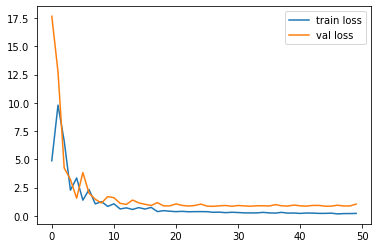

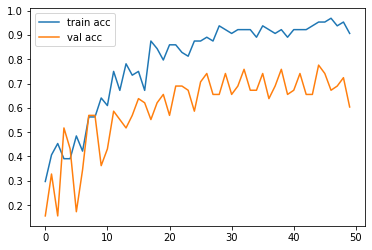

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

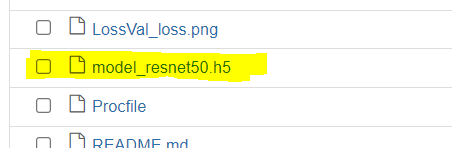

In [25]:

y_pred = model.predict(test_set)


In [26]:
y_pred

array([[4.04185383e-03, 9.79554594e-01, 1.64035913e-02],
       [5.36650009e-02, 4.52495843e-01, 4.93839234e-01],
       [8.84477735e-01, 3.14418115e-02, 8.40804875e-02],
       [1.36679895e-02, 9.06237960e-02, 8.95708144e-01],
       [1.70959421e-02, 8.07262897e-01, 1.75641119e-01],
       [2.70947777e-02, 3.50083023e-01, 6.22822225e-01],
       [2.49148652e-01, 3.11654955e-01, 4.39196378e-01],
       [2.05610693e-02, 1.83023885e-01, 7.96415091e-01],
       [5.04527651e-02, 2.89083421e-02, 9.20638919e-01],
       [9.10737455e-01, 8.08638930e-02, 8.39859154e-03],
       [1.28075435e-05, 5.00090595e-04, 9.99487042e-01],
       [3.13523337e-02, 2.59097874e-01, 7.09549844e-01],
       [2.60623544e-01, 1.82531908e-01, 5.56844592e-01],
       [2.40306258e-02, 3.49662057e-03, 9.72472727e-01],
       [2.76935726e-01, 2.23888513e-02, 7.00675428e-01],
       [6.14283420e-02, 1.40063718e-01, 7.98507869e-01],
       [8.31017673e-01, 4.48225588e-02, 1.24159805e-01],
       [9.11100244e-04, 9.83408

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2], dtype=int64)

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_resnet50.h5')

In [31]:
img_data

NameError: name 'img_data' is not defined

In [32]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [33]:
image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\Hp\\anaconda3\\envs\\carbrand\\lib\\site-packages\\tensorflow\\keras\\preprocessing\\image\\__init__.py'>

In [34]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [35]:
x.shape

(224, 224, 3)

In [36]:
x=x/255

In [37]:
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

array([[0.00270021, 0.07769553, 0.91960424]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

In [41]:
a

array([2], dtype=int64)

In [42]:
a==1

array([False])